In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv(r"data\phase1_results.csv")

In [3]:
train_data = data[['Category',
 'Price_Nos',
 'Ratings_Nos',
 'Upd_Brand_Names',
 'Glb_Ratings_Rev']].copy()

In [4]:
# apply one-hot encoding to all text columns in train_data dataframe using sklearn library and preprocessing module to apply to all columns in single statement
categorical_features = ['Category', 'Upd_Brand_Names']
numeric_features = ['Price_Nos', 'Ratings_Nos', 'Glb_Ratings_Rev']
# apply one-hot encoding to all text columns in train_data dataframe using sklearn library and preprocessing module to apply to all columns in single statement
categorical_features = ['Category', 'Upd_Brand_Names']
onehot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_features),
        ('num', numeric_transformer, numeric_features)])

In [5]:
# Create a pipeline with preprocessing and KMeans
kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Adjust n_clusters as needed
])

In [6]:
# Fit the pipeline
kmeans_pipeline.fit(train_data)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('kmeans', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [7]:
# provide the cluster labels for each data point
cluster_labels = kmeans_pipeline.named_steps['kmeans'].labels_

In [8]:
# calculate the silhouette score to evaluate the clustering performance
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(preprocessor.transform(train_data), cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1561243232281472


In [9]:
# I would like to create a function that carries out the above operations and run it multiple times with different values of n and create a plot of silhouette scores against n values
def evaluate_kmeans_clustering(data, n_clusters_list):
    silhouette_scores = {}
    for i in n_clusters_list:
        kmeans_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('kmeans', KMeans(n_clusters=i, random_state=42))
        ])
        kmeans_pipeline.fit(data)
        cluster_labels = kmeans_pipeline.named_steps['kmeans'].labels_
        silhouette_avg = silhouette_score(preprocessor.transform(data), cluster_labels)
        silhouette_scores[i] = silhouette_avg
    return silhouette_scores

In [10]:
# list of n values to test
n_values = list(range(3, 11))

In [11]:
# run the evaluate_kmeans_clustering function
silhouette_results = evaluate_kmeans_clustering(train_data, n_values)

In [12]:
# convert the silhouette_results dictionary to a dataframe for easy plotting
silhouette_df = pd.DataFrame(list(silhouette_results.items()), columns=['n_clusters', 'silhouette_score'])

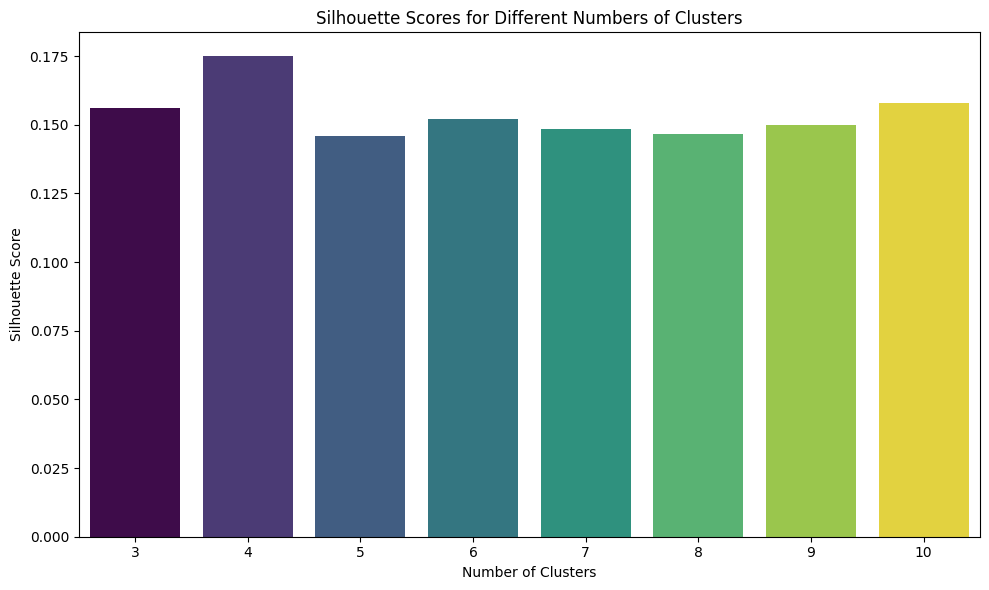

In [18]:
# create bar plot of silhouette scores against n values using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax, x='n_clusters', y='silhouette_score', data=silhouette_df, palette='viridis', hue ='n_clusters', dodge='auto', legend=False)
ax.set_title('Silhouette Scores for Different Numbers of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [ ]:
# Create the final pipeline with preprocessing and KMeans
fnl_kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust n_clusters as needed
])
# Fit the pipeline
fnl_kmeans_pipeline.fit(train_data)
# provide the cluster labels for each data point
fnl_cluster_labels = fnl_kmeans_pipeline.named_steps['kmeans'].labels_

In [ ]:
# apply the retrieved labels to the original dataframe as a new column
data['KMeans_Cluster_Labels'] = fnl_cluster_labels